# Nairaland in Figures and Pictures

#### Import necessary libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os, time, datetime, re, math
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:

os.getcwd()

'C:\\Users\\Azeez Monsur'

In [2]:
enc = "iso-8859-15"
path_csv = r"E:\File_Manager\Projects\Python\Doc Files\CSV"
df = pd.read_csv(f"{path_csv}/nl_dataset.csv", encoding=enc)


In [3]:
df

,ï»¿topic,category,number of views,number of comments,keywords,author name,weekday created,date created,time created,weekday moved to frontpage,date moved to frontpage,time moved to frontpage,date copied to db,time copied to db,mktime created,mktime moved,topic URL
0,Father Who Defiled His 6 And 9-Year-Old Daught...,Crime,23862,150,"['daughters', 'ondo', 'father', 'year', 'arres...",monddy,Mon,25-May-2020,11:01am,Mon,25-May-2020,11:44am,27-May-2020,01:30pm,1.590401e+09,1.590403e+09,https://www.nairaland.com/5880999/father-defil...
1,Buhari: We Donât Have Any Money To Import Fo...,Politics,23384,180,"['start', 'producing', 'buhari', 'dont', 'mone...",maupe,Mon,25-May-2020,9:30am,Mon,25-May-2020,11:30am,27-May-2020,01:30pm,1.590395e+09,1.590403e+09,https://www.nairaland.com/5880799/buhari-dont-...
2,Photos Of Ore Flyover Bridge In Ondo State,Travel,65130,270,"['ondo', 'ore', 'bridge', 'photos', 'state', '...",Sanromeo,Sun,24-May-2020,9:21am,Mon,25-May-2020,11:16am,27-May-2020,01:30pm,1.590308e+09,1.590402e+09,https://www.nairaland.com/5878914/photos-ore-f...
3,Cross River State Government Declares 35 Perso...,Crime,19926,120,"['river', 'persons', 'wanted', 'state', 'cross...",oshozondii,Mon,25-May-2020,10:25am,Mon,25-May-2020,10:49am,27-May-2020,01:30pm,1.590399e+09,1.590400e+09,https://www.nairaland.com/5880910/cross-river-...
4,Osun: Amotekun Catches Gang Leader 'Shadow' Th...,Crime,60594,150,"['shadow', 'leader', 'sex', 'gang', 'commercia...",sexyYBMB,Mon,25-May-2020,9:38am,Mon,25-May-2020,10:38am,27-May-2020,01:30pm,1.590396e+09,1.590399e+09,https://www.nairaland.com/5880813/osun-amoteku...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,36 Moat Academy Alumni Honored With Achievemen...,Career,4189,60,"['awards', 'moat', 'honored', 'alumni', 'acade...",moatacad,Thu,29-Dec-2022,6:34pm,Fri,30-Dec-2022,8:51am,01-Jan-2023,09:07am,1.672335e+09,1.672387e+09,https://www.nairaland.com/7501699/36-moat-acad...
1191,What Are You Thanking For As 2022 Is Coming To...,Religion,6775,210,"['thanking', 'end', 'coming']",obembet,Fri,30-Dec-2022,8:21am,Fri,30-Dec-2022,8:24am,01-Jan-2023,09:07am,1.672385e+09,1.672385e+09,https://www.nairaland.com/7502363/what-thankin...
1192,Video Of Projects Commissioned By President Bu...,Politics,19048,90,"['commissioned', 'projects', 'kogi', 'presiden...",Oluboh,Fri,30-Dec-2022,6:59am,Fri,30-Dec-2022,7:24am,01-Jan-2023,09:07am,1.672380e+09,1.672381e+09,https://www.nairaland.com/7502265/video-projec...
1193,Adams Oshiomhole Gets Into Dance Competition W...,Politics,16313,90,"['oshiomhole', 'dance', 'children', 'video', '...",oikirodah,Thu,29-Dec-2022,3:24pm,Fri,30-Dec-2022,6:53am,01-Jan-2023,09:07am,1.672324e+09,1.672380e+09,https://www.nairaland.com/7501401/adams-oshiom...


In [4]:
df["number of views"].max()
#df["date moved to frontpage"].tail(70)

134098

In [5]:
oldest = df["mktime moved"].min()
earliest = df["mktime moved"].max()
new_earliest = earliest
#time.ctime(earliest - (7*86400))
oldest = re.sub(r"\s+", " ", time.ctime(oldest)).split(" ")[1:3]
earliest = re.sub(r" \s+", " ", time.ctime(earliest)).split(" ")[1:3]
oldest.reverse()
earliest.reverse()
oldest = " ".join(oldest)
earliest = " ".join(earliest)

from_to = f"Data collected from {oldest} - {earliest}, 2020"
from_to

'Data collected from 22 May - 31 Dec, 2020'

In [6]:
df = df.dropna()

In [7]:
date = pd.to_datetime(df["time moved to frontpage"])
df["hour"] = date.dt.hour + (0.01 * date.dt.minute)


<ipython-input-7-f58d7f5d167f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hour"] = date.dt.hour + (0.01 * date.dt.minute)


# Visualisation (Explorative Analysis)

#### Histogram and density ploy

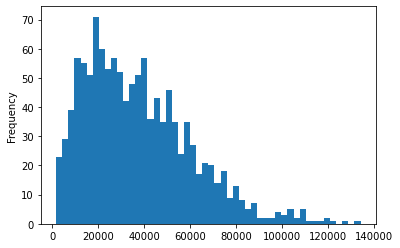

In [8]:
df["number of views"].plot.hist(bins=50);


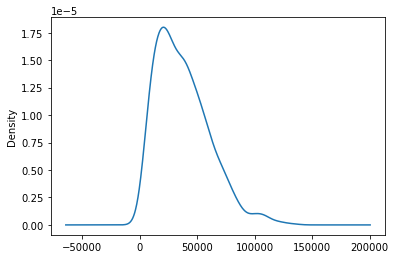

In [9]:
df["number of views"].plot.density();


#### Pick hours for moving topics to front page

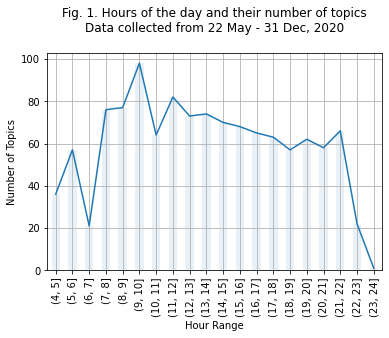

In [10]:
bins = np.array([x for x in range(4, 25)])
factor = pd.cut(df["hour"], bins)
grouped = df["hour"].groupby(factor)
grouped.count().plot(kind="line")
grouped.count().plot(kind="bar", alpha=0.1)

plt.grid()
plt.xlabel("Hour Range")
plt.ylabel("Number of Topics")
plt.xticks(rotation="vertical")
plt.title(f"Fig. 1. Hours of the day and their number of topics\n{from_to}\n")
#plt.savefig("android/IMG/Pick_hour.png")
plt.show();

#### Most category at the frontpage

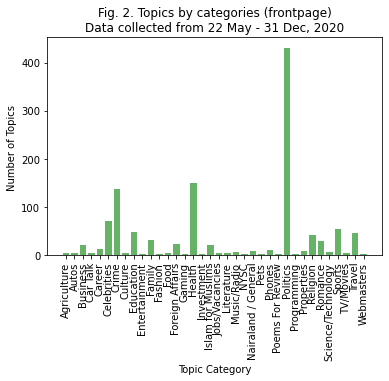

In [11]:
categories = [cate for cate, dt in df.groupby("category")]
plt.bar(categories, df.groupby("category")["category"].count(), color="g", alpha=0.6)
_ = plt.xticks(categories, rotation="vertical")
_ = plt.title(f"Fig. 2. Topics by categories (frontpage)\n{from_to}")
_ = plt.xlabel("Topic Category")
_ = plt.ylabel("Number of Topics ")
#plt.savefig("android/IMG/Most_category.jpeg")
plt.show();


#### Members with most topics

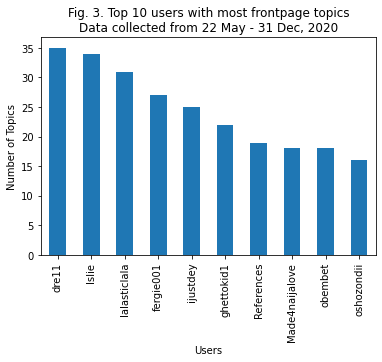

In [12]:
df["author name"].value_counts().head(10).plot(kind="bar")
plt.ylabel("Number of Topics")
plt.xlabel("Users")
plt.title(f"Fig. 3. Top 10 users with most frontpage topics\n{from_to}")
#plt.savefig("android/IMG/Member_topics.jpeg")
plt.show();

#### Finding time difference between time that topics are created and time they make it to the front-page

In [15]:
df["time difference"] = abs(df["mktime moved"] - df["mktime created"]) / 3600
#df["time difference"] = df["time difference"].apply(lambda x: str(datetime.timedelta(seconds=x)))
#df.sort_values("time difference")



<ipython-input-15-63ef0b10076e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time difference"] = abs(df["mktime moved"] - df["mktime created"]) / 3600


In [16]:
df.sort_values(by="category", axis=0)


,ï»¿topic,category,number of views,number of comments,keywords,author name,weekday created,date created,time created,weekday moved to frontpage,date moved to frontpage,time moved to frontpage,date copied to db,time copied to db,mktime created,mktime moved,topic URL,hour,time difference
965,Lagos Farmers Show Their Produce (Pictures),Agriculture,40417,90,"['produce', 'lagos', 'show', 'pictures', 'farm...",Lanrelagboi,Sun,07-Jun-2020,1:40pm,Sun,07-Jun-2020,2:08pm,10-Jun-2020,07:15am,1.591534e+09,1.591535e+09,https://www.nairaland.com/5909405/lagos-farmer...,14.08,0.466667
475,"Rivers State To Inaugurate Cassava Plant, To E...",Agriculture,19198,90,"['rivers', 'state', 'employ', 'cassava', 'pers...",Anambra1stSon,Fri,29-May-2020,6:32am,Fri,29-May-2020,8:39am,01-Jun-2020,05:31am,1.590730e+09,1.590738e+09,https://www.nairaland.com/5889259/rivers-state...,8.39,2.116667
507,Ukwulu Invasion: Outcry As Fulani Herdsmen Rui...,Agriculture,34555,240,"['anambra', 'video', 'ruin', 'farmlands', 'ukw...",Samakus,Thu,28-May-2020,9:16am,Sat,30-May-2020,11:07am,02-Jun-2020,03:23am,1.590654e+09,1.590833e+09,https://www.nairaland.com/5887325/ukwulu-invas...,11.07,49.850000
464,"IVM Expansion: Igwe Nnewi Endorses Plan, Bless...",Autos,46059,180,"['expansion', 'locationphotos', 'endorses', 'b...",Anambra1stSon,Wed,27-May-2020,4:40pm,Fri,29-May-2020,10:14am,01-Jun-2020,05:31am,1.590594e+09,1.590744e+09,https://www.nairaland.com/5886156/ivm-expansio...,10.14,41.566667
8,How Much Should I Pay Someone To Drive My Car ...,Autos,44641,300,"['car', 'pay', 'drive', 'abuja', 'lagos']",9jaHustler,Sun,24-May-2020,12:42pm,Mon,25-May-2020,9:17am,27-May-2020,01:30pm,1.590321e+09,1.590395e+09,https://www.nairaland.com/5879240/how-much-sho...,9.17,20.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,Ongoing Work At Enugu International Airport (P...,Travel,39659,120,"['enugu', 'photos', 'airport', 'work', 'intern...",fergie006,Mon,01-Jun-2020,3:31pm,Mon,01-Jun-2020,6:09pm,04-Jun-2020,07:17am,1.591022e+09,1.591031e+09,https://www.nairaland.com/5896504/ongoing-work...,18.09,2.633333
920,FG Announces Five Airports To Be Reopened By J...,Travel,49340,90,"['june', 'announces', 'reopened', 'fg', 'airpo...",NwekeUG,Wed,03-Jun-2020,2:02pm,Wed,03-Jun-2020,3:04pm,08-Jun-2020,03:24pm,1.591189e+09,1.591193e+09,https://www.nairaland.com/5900745/fg-announces...,15.04,1.033333
328,My Flight Experience With A Flight Attendant,Travel,70132,330,"['flight', 'attendant', 'experience']",Chuky7,Mon,18-May-2020,10:08pm,Tue,26-May-2020,6:12pm,29-May-2020,04:19pm,1.589836e+09,1.590513e+09,https://www.nairaland.com/5866915/flight-exper...,18.12,188.066667
173,"Help! Gurus In The House, How Can I Recover My...",Webmasters,13422,120,"['gurus', 'recover', 'gmail', 'account', 'house']",tosyne2much,Thu,21-May-2020,6:59pm,Fri,22-May-2020,11:42am,27-May-2020,01:37pm,1.590084e+09,1.590144e+09,https://www.nairaland.com/5873511/gurus-house-...,11.42,16.716667


#### Bucketing dataset (time interval)

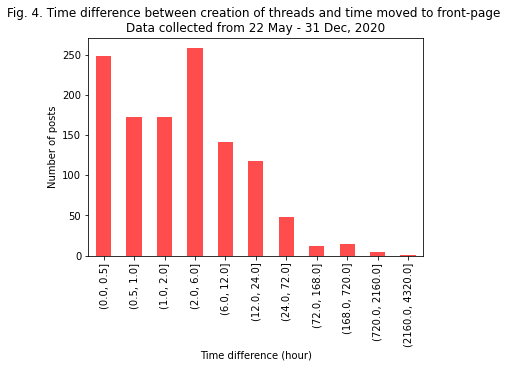

In [18]:
bins = np.array([0, 30, 60, 120, 360, 720, 1440, 4320, 10080, 43200, 129600, 259200])
factor = pd.cut(df["time difference"], bins/int(60))
grouped = df["topic URL"].groupby(factor)
grouped.count().plot(kind="bar", color="r", alpha=0.7)
plt.xticks(rotation="vertical")
plt.xlabel("Time difference (hour)")
plt.ylabel("Number of posts")
plt.title(f"Fig. 4. Time difference between creation of threads and time moved to front-page \n{from_to}")
#plt.savefig("android/IMG/Time_diff.jpeg")
plt.show();


#### Most used keywords in the last 7 days

C:\Users\Azeez Monsur\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Azeez Monsur\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


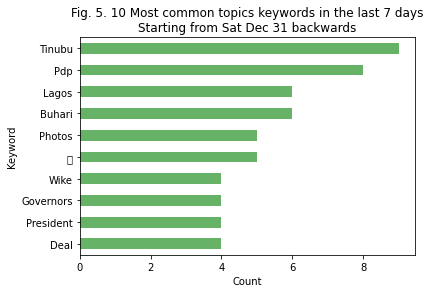

In [34]:
import ast
ticks = list(range(0, 51, 5))
last_seven_days = df[df["mktime moved"] > df["mktime moved"].max() - (7 * 86400)]
k_words = last_seven_days["keywords"]
starting_time = ' '.join(time.ctime(new_earliest).split()[0:3])
#df["mktime moved"].apply(lambda x: time.ctime(x - 0 * 86400))
k_words = pd.Series([word.capitalize() for word_list in k_words for word in ast.literal_eval(word_list)]).value_counts().sort_values().tail(10)
k_words.plot(kind="barh", color="g", alpha=0.6)
plt.title(f"Fig. 5. 10 Most common keywords in the last 7 days\nStarting from {starting_time} backwards")
#plt.xticks(ticks)
#plt.xlim(10,50)
plt.ylabel("Keyword")
plt.xlabel("Count")
plt.show(); 

#### set  index to Pandas datetime

In [20]:
df.set_index(pd.to_datetime(df["date moved to frontpage"]));

# Statistics on Topics per day

In [21]:
df["day"] = df["date moved to frontpage"].apply(lambda x: x.split("-")[0])
df["count"] = 1

<ipython-input-21-03dcfac94c21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["day"] = df["date moved to frontpage"].apply(lambda x: x.split("-")[0])
<ipython-input-21-03dcfac94c21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["count"] = 1


#### On different fields

In [22]:
topic_stat = df.groupby(["day"]).sum()
topic_stat[["count", "number of views", "number of comments"]]


,count,number of views,number of comments
day,,,
01,66,2550224,11010
02,61,2574007,10980
03,57,2305554,10710
04,67,2475364,11700
05,57,2459131,9390
06,51,2170194,10710
07,54,1896246,10530
08,63,2277064,10410
09,46,1778396,8040


#### Number of topics per day of the week

In [29]:
days = df.loc[df["day"].apply(lambda x: int(x)) < 29]
days = days.groupby("weekday moved to frontpage").sum()
days[["count", "number of views", "number of comments"]].sort_values("count", ascending=False)

day_map = {1: "Sun", 2: "Mon", 3: "Tue", 4: "Wed", 5: "Thu", 6: "Fri", 7: "Sat"}

,count,number of views,number of comments
weekday moved to frontpage,,,
Mon,191,7260752,32280
Tue,163,6751246,29880
Thu,144,5105856,24150
Wed,117,4382984,20730
Fri,111,4370492,21210
Sat,108,4555270,22320
Sun,104,3902113,20130


#### Average number of topics posted per day

In [30]:
"Average topics per day:", int(topic_stat["count"].mean())


('Average topics per day:', 62)

#### Average number of views

In [31]:
"Average number of views per day:", int(topic_stat["number of views"].mean())


('Average number of views per day:', 2344769)

#### Average number comments

In [32]:
"Average number of comments per day:", int(topic_stat["number of comments"].mean())



('Average number of comments per day:', 11313)

#### Working with crosstab

In [33]:
index = list(df["author name"].value_counts().index)

index = index[:10]
df_new = df[df["author name"].isin(index)].copy()
ct = pd.crosstab(df_new["author name"], df_new["weekday created"], margins=False)

ct

weekday created,Fri,Mon,Sat,Sun,Thu,Tue,Wed
author name,,,,,,,
Islie,5,3,7,5,6,2,6
Made4naijalove,3,2,3,2,6,1,1
References,3,5,2,3,3,2,1
dre11,4,4,8,6,4,4,5
fergie001,7,4,3,4,3,5,1
ghettokid1,6,3,4,1,4,1,3
ijustdey,3,7,1,3,3,4,4
lalasticlala,2,4,6,5,1,4,9
obembet,3,4,3,3,1,3,1


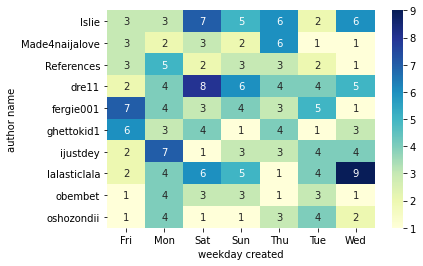

In [25]:
sns.heatmap(ct, cmap="YlGnBu", annot=True, cbar=True);